In [6]:
import  matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import tree

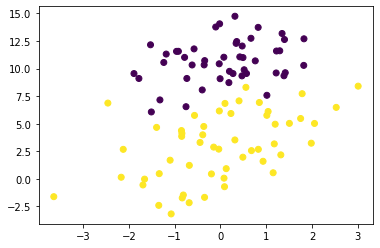

In [8]:
#read data
data = np.genfromtxt("LR-testSet.csv", delimiter = "")
x_data = data[:,:-1]
y_data = data[:, -1]
plt.scatter(x_data[:,0],x_data[:,1],c=y_data)

In [9]:
# building decision tree
model = tree.DecisionTreeClassifier()
model.fit(x_data, y_data)

DecisionTreeClassifier()

In [10]:
# export tree
import graphviz
dot_data = tree.export_graphviz(model, out_file = None, feature_names = ["x", "y"], 
                               class_names = ["label0", "label1"], filled = True, rounded = True, special_characters = True)
graph = graphviz.Source(dot_data)

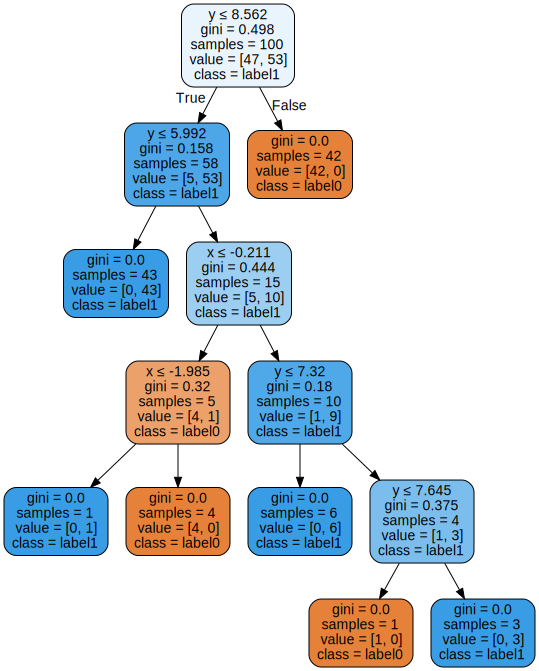

In [11]:
graph


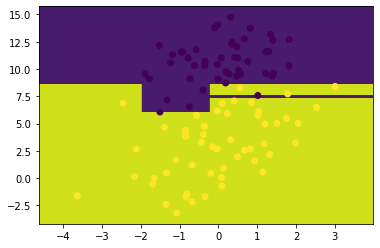

In [15]:
# drawing border 
x_min, x_max = x_data[:,0].min()-1, x_data[:,0].max()+1
y_min, y_max = x_data[:,1].min()-1, x_data[:,1].max()+1
# matrix net 
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
# contour line
cl = plt.contourf(xx, yy, z)
# sample graph
plt.scatter(x_data[:,0], x_data[:,1], c=y_data)
plt.show()

In [16]:
predictions = model.predict(x_data)
print (classification_report(predictions, y_data))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        47
         1.0       1.00      1.00      1.00        53

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

